AssertionError: 

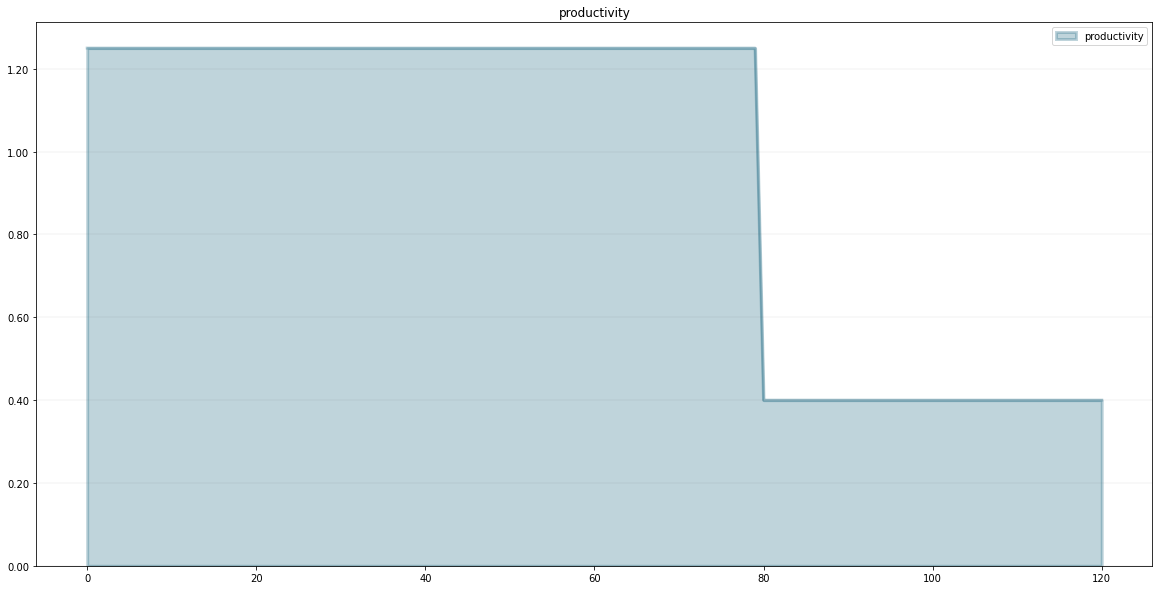

In [3]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd
model = Model(starttime=0.0, stoptime=120.0, dt=1.0,
                name='SimpleProjectManagement')

openTasks = model.stock("openTasks")
closedTasks = model.stock("closedTasks")
staff = model.stock("staff")
completionRate = model.flow("completionRate")
currentTime = model.converter("currentTime")
remainingTime = model.converter("remainingTime")
schedulePressure = model.converter("schedulePressure")
productivity = model.converter("productivity")
deadline = model.constant("deadline")
effortPerTask = model.constant("effortPerTask")
initialStaff = model.constant("initialStaff")
initialOpenTasks = model.constant("initialOpenTasks")

closedTasks.initial_value = 0.0
staff.initial_value = initialStaff
openTasks.initial_value = initialOpenTasks
deadline.equation = 100.0
effortPerTask.equation = 1.0
initialStaff.equation = 1.0
initialOpenTasks.equation = 100.0

currentTime.equation = sd.time()
remainingTime.equation = deadline - currentTime
openTasks.equation = -completionRate
closedTasks.equation = completionRate

schedulePressure.equation = sd.min(
    (openTasks * effortPerTask) / (staff * sd.max(remainingTime, 1)), 2.5)

model.points["productivity"] = [
    [0, 0.4],
    [0.25, 0.444],
    [0.5, 0.506],
    [0.75, 0.594],
    [1, 1],
    [1.25, 1.119],
    [1.5, 1.1625],
    [1.75, 1.2125],
    [2, 1.2375],
    [2.25, 1.245],
    [2.5, 1.25]
]

productivity.equation = sd.lookup(schedulePressure, "productivity")
completionRate.equation = sd.max(0.0, sd.min(
    openTasks, staff * (productivity / effortPerTask)))

productivity.plot()

x = model.converter("x")

# !=
x.equation = sd.If(productivity != 1.0, 1, 0)

for i in range(0, 120+1):
    result = x(i)
    if i < 100:
        assert result == 0
    else:
        assert result == 1

# ==
x.equation = sd.If(productivity == 1.0, 1, 0)

for i in range(0, 120+1):
    result = x(i)
    if i < 100:
        assert result == 1
    else:
        assert result == 0

# >
x.equation = sd.If(productivity > 1.0, 1, 0)

for i in range(0, 120+1):
    result = x(i)
    assert result == 0

# <
x.equation = sd.If(productivity < 1.0, 1, 0)

for i in range(0, 120+1):
    result = x(i)
    if i < 100:
        assert result == 0
    else:
        assert result == 1

# <=
x.equation = sd.If(productivity <= 1.0, 1, 0)

for i in range(0, 120+1):
    result = x(i)

    assert result == 1

# >=
x.equation = sd.If(productivity >= 1.0, 1, 0)

for i in range(0, 120+1):
    result = x(i)

    if i < 100:
        assert result == 1
    else:
        assert result == 0